# 1 - Introdução
- O objetivo do EDA, ou Exploratory Data Analysis, é dar uma olhada nos dados antes de começar a fazer coisas mais complexas. 
- É como ser um investigador curioso, olhando para entender o problema através dos dados. 
- Essa análise nos ajuda a descobrir segredos, padrões e erros nos dados, para tomar decisões mais inteligentes e contar histórias interessantes. 
- Vamos abordar conceitos do EDA, a biblioteca Pandas, coleta e preparação de dados, lidar com dados ausentes, formulação de hipóteses, análise univariada e bivariada, lidar com outliers e automatizar parte do processo.

## 1.1 - Conceitos
Neste módulo, vou explicar o que é a Análise Exploratória de Dados (Exploratory Data Analysis - EDA) e como ela é usada em projetos de ciência de dados. A EDA é um processo sistemático que nos ajuda a entender e resumir as características fundamentais de um conjunto de dados. A primeira etapa da EDA é coletar e preparar os dados, o que envolve capturar dados de diferentes fontes e garantir que eles estejam prontos para análise. Isso inclui transformar os dados, entender suas estruturas e tratar valores ausentes ou atípicos. Depois de preparar os dados, podemos formular hipóteses e usar técnicas de análise, como análise univariada (análise de uma variável), análise bivariada (correlação entre duas variáveis) e análise multivariada (envolvendo mais de duas variáveis). Também podemos realizar análises temporais para entender o comportamento dos dados ao longo do tempo. Além disso, é importante destacar que a forma como comunicamos os resultados da análise é crucial. Devemos adaptar nossa comunicação ao público-alvo, evitando jargões técnicos e garantindo que os dados sejam compreendidos. Neste módulo, também vou apresentar a Biblioteca Pandas, uma ferramenta essencial para análise de dados em Python. O Pandas permite manipular, limpar e analisar dados de forma eficiente, fornecendo estruturas de dados flexíveis, como séries e dataframes. Ele também é compatível com diferentes fontes de dados, como bancos de dados e arquivos CSV ou Excel. Com o Pandas, podemos realizar operações complexas, como filtros e agregações, para facilitar a visualização dos resultados das análises. Portanto, o Pandas é uma ferramenta indispensável para cientistas de dados e analistas que desejam explorar e extrair insights de dados de maneira eficaz e intuitiva.

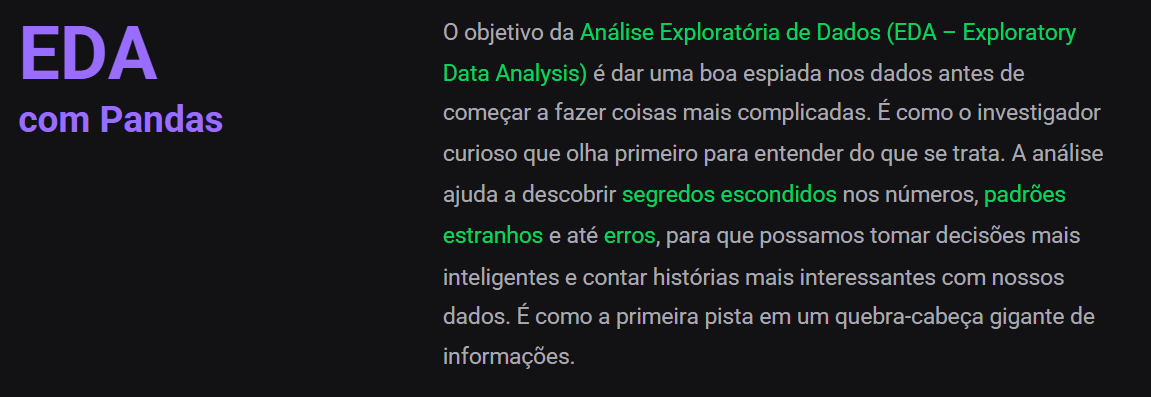

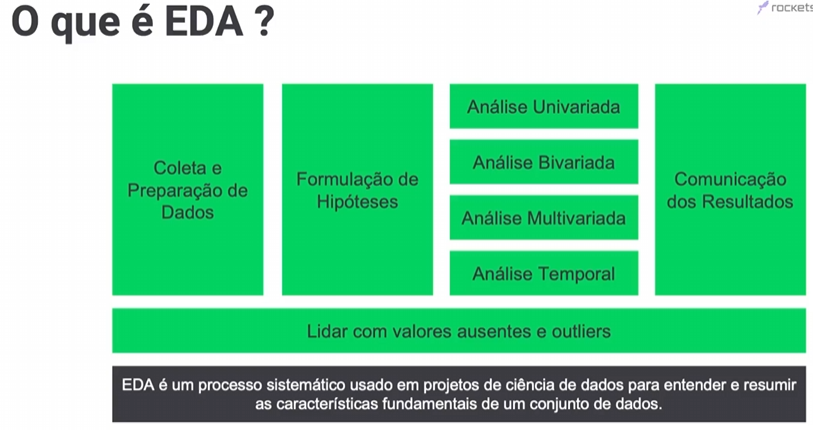

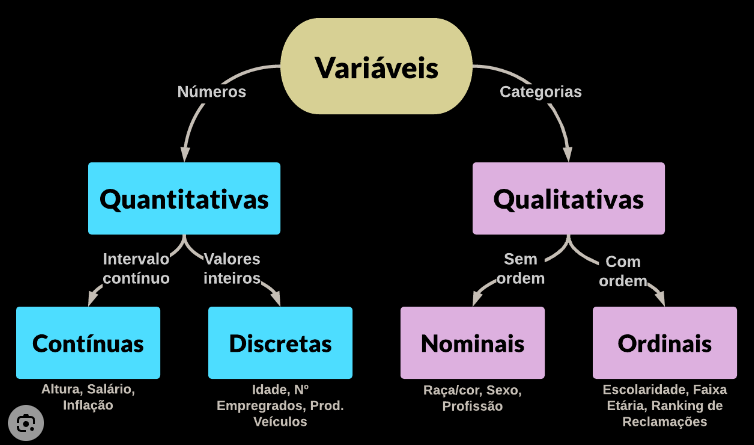

## 1.1 - Importação das bibliotecas

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
import sweetviz as sv

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.2 - Dicas

In [2]:
# Toda vez que trabalhar com número científico, podemos tranformar em um decimal para ficar mais coompreensivo
pd.set_option('display.float_format', lambda x: '%.15f' % x)

# 2 - Coleta e preparação de dados
Nesta aula, vamos explorar os conceitos de análise exploratória de dados na prática, usando um exemplo do setor de Telecom. Temos três conjuntos de dados com informações de clientes e serviços, incluindo uma variável que indica se o cliente abandonou a empresa (churn) ou não. Nosso objetivo é utilizar esses dados e algumas hipóteses para obter insights iniciais e construir uma solução de inteligência artificial capaz de prever o abandono de clientes ativos. Para isso, vamos começar coletando e preparando os dados usando o Pandas. Vamos aprender a ler arquivos, transformar tipos de dados, renomear colunas e unificar os conjuntos de dados. Agora, vamos para o código!

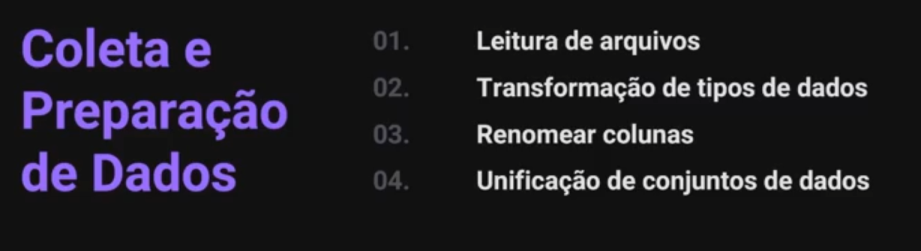

## 2.1 - Hands-On - Carregando Datasets
Nesta aula, aprendemos sobre a criação de DataFrames no Pandas a partir de arquivos CSV. O instrutor mostrou como carregar os dados de três DataFrames diferentes: Customers, Services e Contracts. Ele explicou que um DataFrame é uma estrutura tabular multidimensional, semelhante a uma planilha do Excel, com colunas representando atributos e linhas representando registros. O instrutor também demonstrou como visualizar as primeiras e últimas linhas de um DataFrame, bem como a estrutura do DataFrame, incluindo o número de entradas, o tipo de dado de cada coluna e se há valores nulos. O objetivo desta aula foi apenas criar os DataFrames, e o próximo passo será trabalhar com esses DataFrames para análise de dados.

### 2.1.1 - Criar DataFrames com base nos Datasets
Começaremos com a criação de três DataFrames diferentes no Pandas (Customers, Services e Contracts) a partir de arquivos CSV.<br>
Um <b>DataFrame</b> é uma estrutura tabular multidimensional, semelhante a uma planilha do Excel, com colunas representando atributos e linhas representando registros.<br>
Visualizaremos as primeiras e últimas linhas de um DataFrame, bem como a estrutura do DataFrame, incluindo o número de entradas, o tipo de dado de cada coluna e se há valores nulos. 
Esse primeiro objetivo será de apenas criar os DataFrames, e o próximo passo será trabalhar com esses DataFrames para análise de dados.

#### 2.1.1.1 - DataFrame Contratos (Contracts)

In [3]:
# Carregar DataFrame
df_contracts = pd.read_csv('dados/churn_contracts.csv')

In [4]:
# Mostrar 5 primeiros registros do DataFrame
df_contracts.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.950000000000003,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.65,Yes


In [5]:
# Mostrar estrutura / schema do DataFrame
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


#### 2.1.1.2 - DataFrame Serviços (Services)

In [6]:
# Carregar DataFrame
df_services = pd.read_csv('dados/churn_services.csv')

In [7]:
# Mostrar 5 primeiros registros do DataFrame
df_services.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Mostrar estrutura / schema do DataFrame
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


#### 2.1.1.3 - DataFrame Customers (Customers)

In [9]:
# Carregar DataFrame
df_customers = pd.read_csv('dados/churn_customers.csv')

In [10]:
# Mostrar 5 primeiros registros do DataFrame
df_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
# Mostrar estrutura / schema do DataFrame
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## 2.2 - Hands-On - Transformação de dados
Nesta aula, vamos aprender sobre transformação de dados no Pandas. Vamos focar em um problema específico: o tipo de dado da coluna TotalCharges no DataFrame de contratos. Vou apresentar três abordagens para converter os dados para o tipo float64. A primeira é usar o método astype, que permite converter uma coluna de string para float. No entanto, se houver valores vazios na coluna, ocorrerá um erro. A segunda abordagem é usar o método to_numeric, que também converte os dados para float, mas também retorna um erro se houver valores vazios. A terceira abordagem é usar o parâmetro errors='coerce' no método to_numeric, que converte os valores inválidos em nulos. Vamos explorar essas abordagens e verificar a estrutura dos dados após a transformação.

### 2.2.1 - Tranformação de Dados (Converção de tipos)
Aqui iremos transformar os dados no Pandas.<br> 
Três exemplos para converter os dados para o tipo float64. <br>
Vamos explorar essas abordagens e verificar a estrutura dos dados após a transformação.

#### 2.2.1.1 - <b>Primeira:</b> usar o método astype, que permite converter uma coluna de string para float. No entanto, se houver valores vazios na coluna, ocorrerá um erro.<br>

In [12]:
# Transormar coluna TotalCharges de String para Float - Primeira Abordagem com astype
# df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)

#### 2.2.1.2 - <b>Segunda:</b> usar o método to_numeric, que também converte os dados para float, mas também retorna um erro se houver valores vazios. <br>

In [13]:
# Transormar coluna TotalCharges de String para Float - Segunda Abordagem com to_numeric
# df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)

#### 2.2.1.1 - <b>Terceira:</b> usar o parâmetro errors='coerce' no método to_numeric, que converte os valores inválidos em nulos. <br><br>

In [14]:
# Transormar coluna TotalCharges de String para Float - Segunda Abordagem com to_numeric com coerce
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

In [15]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


## 2.3 - Hands-On - Renomear colunas
Nesta aula, aprendemos como renomear colunas em um dataframe usando o método rename do Pandas. Existem diferentes abordagens para renomear colunas, dependendo do contexto. Uma forma é usar um dicionário para especificar o nome antigo da coluna e o novo nome que queremos atribuir a ela. Outra forma é usar uma lista de nomes novos para substituir todas as colunas do dataframe. Também discutimos o uso do argumento inplace, que permite aplicar as alterações diretamente no dataframe original ou criar um novo dataframe com as colunas renomeadas.

In [16]:
# Alem de usar o df.rename(columns={'Colunainicial':'Colunarenomeada'}, inplace=True)
# Podemos renomear todas da seguinte forma
df_customers.columns = ['IDcliente', 'Genero', 'Mais65anos', 'PossuiParceiro', 'PossuiDependentes']
df_customers.columns

Index(['IDcliente', 'Genero', 'Mais65anos', 'PossuiParceiro',
       'PossuiDependentes'],
      dtype='object')

In [17]:
# Renomer colunas Data Frame services antes de fazer a junção
df_services.columns = ['IDcliente','Telefone', 'VariasLinhas', 'Internet', 'AntivirusOnline', 'BackupOnline', 'ProtecaoEquipamento', 'Suporte', 'TVOnLine', 'FilmesOnline']

In [18]:
# Renomer colunas Data Frame contracts antes de fazer a junção
df_contracts.columns = ['customerID', 'TempoUso', 'PrazoContrato', 'SemFaturaImpressa', 'FormaPagamento', 'Mensalidade', 'TotalPagamentos', 'CancelouServico']

## 2.4 - Hands-On - Unificando Datasets
Nesta aula, aprendemos como unificar Data Frames no Pandas. Primeiro, verificamos a quantidade de registros em cada Data Frame usando a função len(). Em seguida, renomeamos as colunas para garantir que as colunas de unificação tenham o mesmo nome nos Data Frames. Depois, unificamos os Data Frames usando o método merge(), especificando as colunas de unificação. Também aprendemos a lidar com colunas de unificação com nomes diferentes usando os argumentos left_on e right_on. Por fim, removemos colunas duplicadas usando o método drop(). Agora temos um único Data Frame com todas as informações dos clientes, serviços e contratos.<br>

In [19]:
# Verificand as quantidades de registros dos Data Frames
print(len(df_contracts), len(df_customers), len(df_services))

7043 7043 7043


In [20]:
# Não traduzimos o atributo customerID do DF Contracts, para ver as formas de junção, 
# lidando com colunas de unificação com nomes diferentes usando os argumentos left_on e right_on
df_churn = df_customers.merge(df_services, on=['IDcliente']).merge(df_contracts, left_on=['IDcliente'], right_on=['customerID'])
df_churn.head()

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,TVOnLine,FilmesOnline,customerID,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,5575-GNVDE,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes


In [21]:
# Por fim removemos colunas duplicadas usando o método drop().
# Chegando assim a um único mData Frame com todas as informações dos clientes, serviços e contratos.

df_churn.drop(['customerID'], axis=1, inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDcliente            7043 non-null   object 
 1   Genero               7043 non-null   object 
 2   Mais65anos           7043 non-null   int64  
 3   PossuiParceiro       7043 non-null   object 
 4   PossuiDependentes    7043 non-null   object 
 5   Telefone             7043 non-null   object 
 6   VariasLinhas         7043 non-null   object 
 7   Internet             7043 non-null   object 
 8   AntivirusOnline      7043 non-null   object 
 9   BackupOnline         7043 non-null   object 
 10  ProtecaoEquipamento  7043 non-null   object 
 11  Suporte              7043 non-null   object 
 12  TVOnLine             7043 non-null   object 
 13  FilmesOnline         7043 non-null   object 
 14  TempoUso             7043 non-null   int64  
 15  PrazoContrato        7043 non-null   o

# 3 - Lidando com dados ausentes

Existem três categorias de dados faltantes: 
1. <font color=yellow>Missing completly at random (MCAR) – Dados Faltantes completamente ao acaso</font>:<br>
Ocorre quando não há um padrão na ausência do valor. Por exemplo, podemos supor que os valores ausentes para a coluna "Salário" são completamente aleatórios, não devido ao próprio salário e nem por qualquer outra variável. Às vezes, as pessoas simplesmente esquecem de preencher esse valor sem motivo específico. No entanto, é importante observar que esse tipo de ausência é muito raro. Geralmente, existem razões pelas quais certos valores estão ausentes e você deve investigá-las.
2. dados faltantes ao acaso e 
3. dados faltantes não ao acaso. <br><br>

Teremos exemplo de cada uma delas para facilitar o entendimento. <br>
Em seguida, vamos ver <b>como detectar</b> esses dados ausentes e <b>como lidar</b> com eles, seja excluindo-os ou imputando valores para substituí-los. <br>
É importante saber lidar com dados ausentes, especialmente quando estamos trabalhando com inteligência artificial.

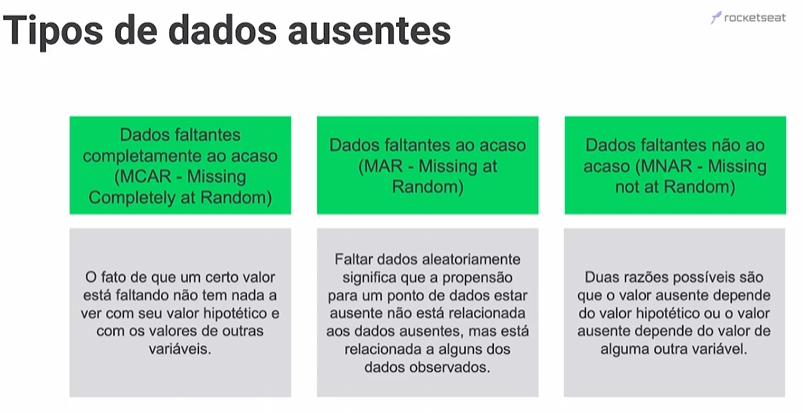

## 3.1 - Hands-On - Detecção de valores ausentes
Nesta aula, aprendemos como identificar e lidar com valores ausentes em um conjunto de dados. Primeiro, vimos como identificar as linhas que possuem pelo menos um valor ausente, o que pode nos ajudar a encontrar padrões ou erros sistemáticos nos dados. Em seguida, aprendemos a contar quantas colunas têm pelo menos um valor ausente, o que pode indicar problemas no conjunto de dados. Também vimos como identificar a quantidade de valores ausentes em uma coluna específica. Por fim, aprendemos a contar quantas linhas têm pelo menos um valor ausente em alguma coluna, o que pode ser útil para decidir se devemos remover ou refinar o conjunto de dados.

In [22]:
# Resumo do Data Frame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDcliente            7043 non-null   object 
 1   Genero               7043 non-null   object 
 2   Mais65anos           7043 non-null   int64  
 3   PossuiParceiro       7043 non-null   object 
 4   PossuiDependentes    7043 non-null   object 
 5   Telefone             7043 non-null   object 
 6   VariasLinhas         7043 non-null   object 
 7   Internet             7043 non-null   object 
 8   AntivirusOnline      7043 non-null   object 
 9   BackupOnline         7043 non-null   object 
 10  ProtecaoEquipamento  7043 non-null   object 
 11  Suporte              7043 non-null   object 
 12  TVOnLine             7043 non-null   object 
 13  FilmesOnline         7043 non-null   object 
 14  TempoUso             7043 non-null   int64  
 15  PrazoContrato        7043 non-null   o

In [23]:
# Detectar valores ausentes em todas as colunas de um Data Frame
df_churn.isna().sum()

IDcliente               0
Genero                  0
Mais65anos              0
PossuiParceiro          0
PossuiDependentes       0
Telefone                0
VariasLinhas            0
Internet                0
AntivirusOnline         0
BackupOnline            0
ProtecaoEquipamento     0
Suporte                 0
TVOnLine                0
FilmesOnline            0
TempoUso                0
PrazoContrato           0
SemFaturaImpressa       0
FormaPagamento          0
Mensalidade             0
TotalPagamentos        11
CancelouServico         0
dtype: int64

In [24]:
# Detectar valores ausentes de uma coluna
df_churn.TotalPagamentos.isna().sum()

11

In [25]:
# Quantas linhas tem pelo menos uma coluna com valor ausente
# Identificar se há um padrão
df_churn[df_churn.isna().any(axis=1)]

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.549999999999997,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.250000000000000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.849999999999994,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.750000000000000,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.049999999999997,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.850000000000001,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.350000000000001,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.000000000000000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.699999999999999,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.349999999999994,NaN,No


In [26]:
# Quantas colunas tem pelo menos um valor ausente "contrário de linhas"
# Identificar algum erro sistemático para refinar
df_churn.isna().any(axis=0)

IDcliente              False
Genero                 False
Mais65anos             False
PossuiParceiro         False
PossuiDependentes      False
Telefone               False
VariasLinhas           False
Internet               False
AntivirusOnline        False
BackupOnline           False
ProtecaoEquipamento    False
Suporte                False
TVOnLine               False
FilmesOnline           False
TempoUso               False
PrazoContrato          False
SemFaturaImpressa      False
FormaPagamento         False
Mensalidade            False
TotalPagamentos         True
CancelouServico        False
dtype: bool

## 3.2 - Hands-On - Remover valores ausentes
Nesta aula, aprendemos diferentes técnicas para lidar com valores ausentes em um DataFrame. Primeiro, vimos como remover colunas que possuem valores ausentes, usando o método drop e especificando o eixo das colunas. Também aprendemos a remover colunas onde todos os valores são ausentes, usando o método dropna e o argumento all. Em seguida, exploramos a técnica de imputação de valores, onde substituímos os valores ausentes por outros valores. Vimos como preencher todos os valores ausentes com zero usando o método fillna. Por fim, discutimos a importância de considerar o tipo de variável ao fazer a imputação de valores, especialmente quando lidamos com variáveis categóricas.

### 3.2.1 - Primeira forma - Remover coluna específica com valores ausentes

In [27]:
df_churn.drop(columns=['TotalPagamentos'], axis=1)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,ProtecaoEquipamento,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.950000000000003,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,Yes


### 3.2.2 -Segunda Forma - Remover colunas que não sabemos com valores ausentes

In [ ]:
# Isso acontece quando o DataFrame tem muitas colunas com valores ausentes
df_churn.dropna(axis=1)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,ProtecaoEquipamento,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.950000000000003,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,Yes


### 3.2.2 - Terceira Forma - Remover colunas com TODOS os valores ausentes.


In [29]:
df_churn.dropna(axis=1, how='all')

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes


### 3.2.4 - Quarta Forma - Remover linhas com valores ausentes



In [30]:
df_churn.dropna(axis=0)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes


### 3.2.5 - Quinta Forma - Remover linhas com TODOS valores ausentes.


In [31]:
df_churn.dropna(axis=0, how='all')

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes


## 3.3 - Imputação de valores ausentes

Preencher todos os valores ausentes com 0.
Faz sentido quando o valor é numérico, como medidas, já numa variável categórica não

### 3.3.1 - Primeira forma - Substituir valores nulos por 0


In [32]:
df_churn.fillna(0)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes


### 3.3.2 - Segunda Forma - Substituir valores padrão conforme a coluna

In [33]:
df_churn.fillna(value={'TotalPagamentos': 0, 'Genero': 'Não Declarado'})

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes


### 3.3.3 - Terceira Forma - Preencher todos os valores ausentes de uma coluna com a média

In [34]:
media_TotalPagamentos = df_churn.TotalPagamentos.mean()
media_TotalPagamentos

2283.3004408418656

In [35]:
df_churn.TotalPagamentos.describe()

count   7032.000000000000000
mean    2283.300440841865566
std     2266.771361883144891
min       18.800000000000001
25%      401.449999999999989
50%     1397.474999999999909
75%     3794.737500000000182
max     8684.799999999999272
Name: TotalPagamentos, dtype: float64

In [36]:
df_churn.fillna(value={'TotalPagamentos': media_TotalPagamentos}).head(1)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No


# 4 - Formulando hipóteses

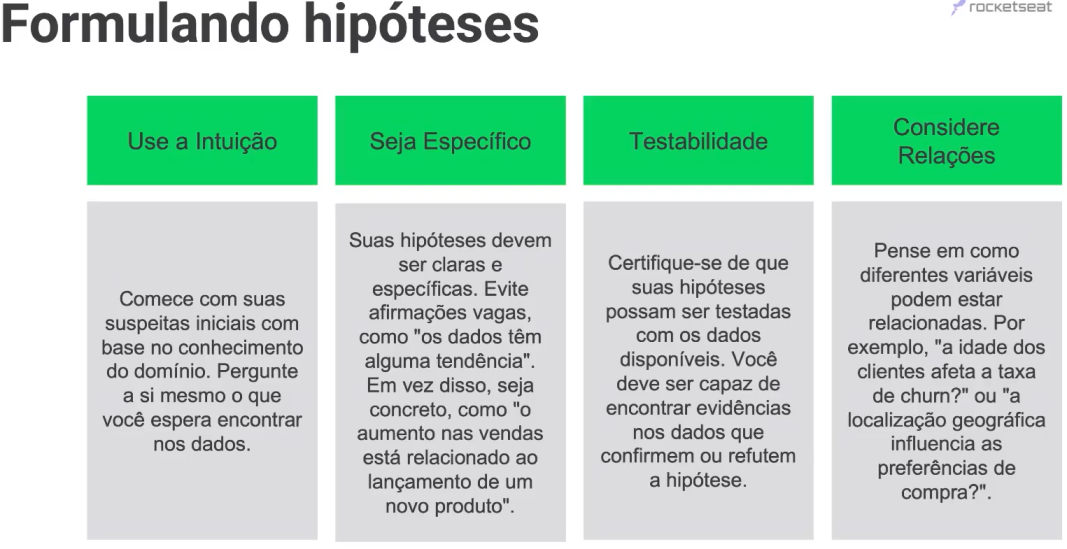

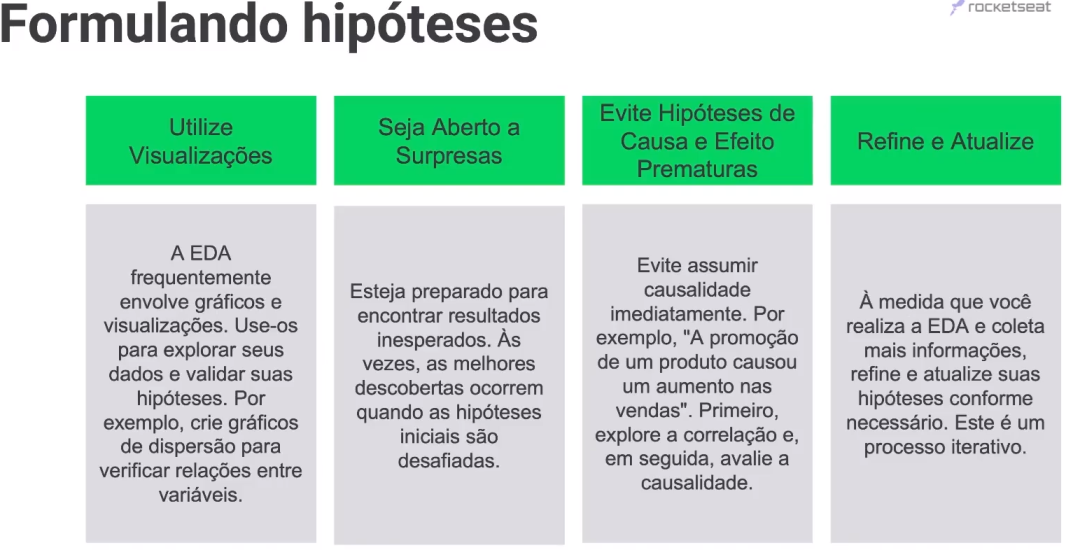

# 5 - Análise Univariada

## 5.1 - Formulação de Hipóteses: Análise univariada variável qualitativa nominal **Churn**
Nesta aula, vamos aprender sobre a importância das visualizações na análise exploratória de dados (EDA). Utilize gráficos e visualizações para explorar seus dados e validar suas hipóteses. Esteja aberto a surpresas, pois as melhores descobertas muitas vezes ocorrem quando as hipóteses iniciais são desafiadas. Evite fazer suposições prematuras de causa e efeito. Primeiro, explore a correlação entre as variáveis e depois avalie a causalidade. Refine e atualize suas hipóteses à medida que coleta mais informações. No contexto do módulo de churn de clientes de uma empresa de telecom, vamos confirmar ou refutar três hipóteses: a faixa etária, o tempo de contrato e o tipo de contrato têm associação com o churn. Utilize sua intuição, seja específico e certifique-se de que suas hipóteses possam ser testadas com os dados disponíveis. Considere também as possíveis relações entre variáveis, como a idade dos clientes afetando a taxa de churn ou a localização geográfica influenciando as preferências de compra.

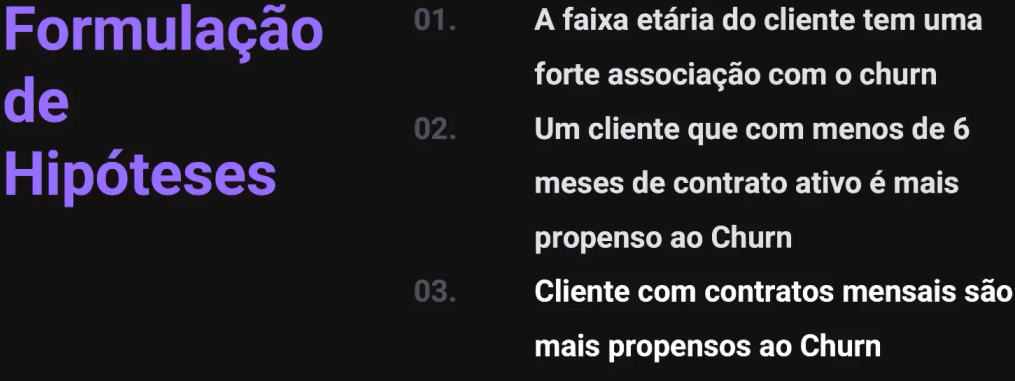

## 5.2 - Análise univariada

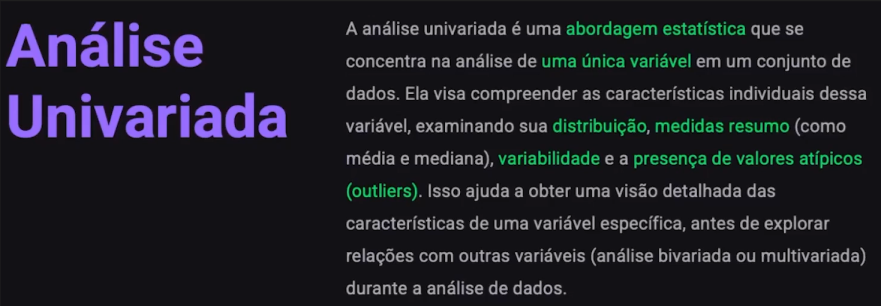

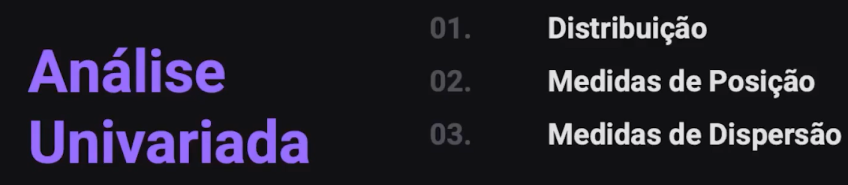

## 5.3 - Hands-On - Distribuição em variáveis categóricas
Nesta aula, começamos a análise univariada do nosso conjunto de dados. Primeiro, focamos na variável "churn", que indica se um cliente abandonou ou não o serviço. Mostramos como contar os valores dessa variável e também como obter a proporção em termos percentuais. Em seguida, utilizamos o matplotlib para gerar gráficos de barras que representam a distribuição do churn em números absolutos e em percentuais.

In [ ]:
# Identificar Valores Únicos Para saber todas as categorias possíveis (valores únicos) de uma variável categórica
df_churn.CancelouServico.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Contar Frequências Absolutas Para contar quantas vezes cada categoria aparece na variável:
df_churn.CancelouServico.value_counts()

CancelouServico
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
# Calcular Frequências Relativas (Percentual) Para calcular o percentual de ocorrência de cada categoria
df_churn.CancelouServico.value_counts(normalize=True)

CancelouServico
No    0.734630129206304
Yes   0.265369870793696
Name: proportion, dtype: float64

### 5.3.1 - Gráficos: Distribuição
Também exploramos a variável "contrato" e analisamos sua distribuição. Observamos que a maioria dos clientes possui contratos mensais. Novos vídeos serão lançados para continuar a análise univariada.

[Text(0, 0, '5174'), Text(0, 0, '1869')]

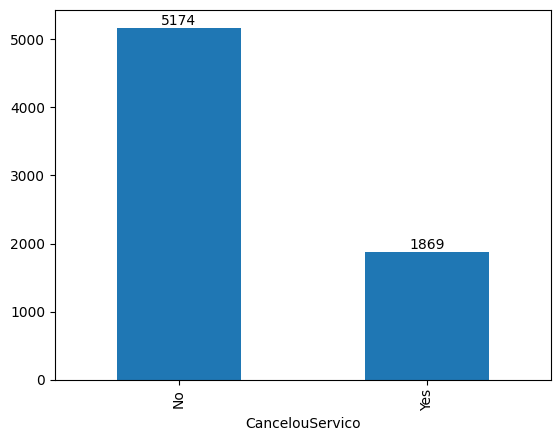

In [40]:
# Mostrando no gráfico a quantidade de churns, mas poderia ser o porcentual
ax = df_churn.CancelouServico.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [41]:
# Quais são os tipos de contrato
df_churn.PrazoContrato.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

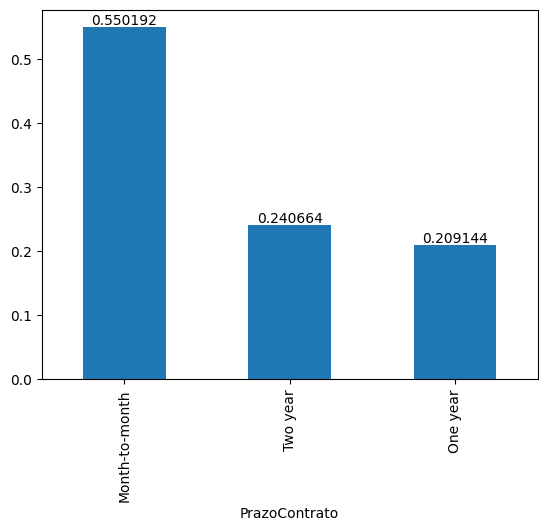

In [42]:
# Mostrando no gráfico a quantidade de tipos de contratos, mas poderia ser o porcentual
ax = df_churn.PrazoContrato.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

## 5.4 - Hands-On - Distribuição em variáveis numéricas
Nesta aula, continuamos nossa análise univariada, agora focando em variáveis numéricas. Exploramos a variável "Tenor", que representa o tempo de contrato dos clientes. Fizemos um histograma para visualizar a distribuição dos valores e observamos que a maioria dos clientes tem contratos de curta duração ou contratos longos. Além disso, calculamos medidas de posição, como a média e a mediana, e medidas de dispersão, como o desvio padrão e o coeficiente de variação. Essas informações nos ajudam a entender melhor o comportamento dos clientes e podem ser úteis na hora de fazer previsões. No próximo vídeo, continuaremos nossa análise univariada explorando outras variáveis numéricas.

In [ ]:
#Entenda o dado
print(df.shape)
print(df.head())
print(df.columns)
print(df.describe())
df.describe()

<Axes: ylabel='Frequency'>

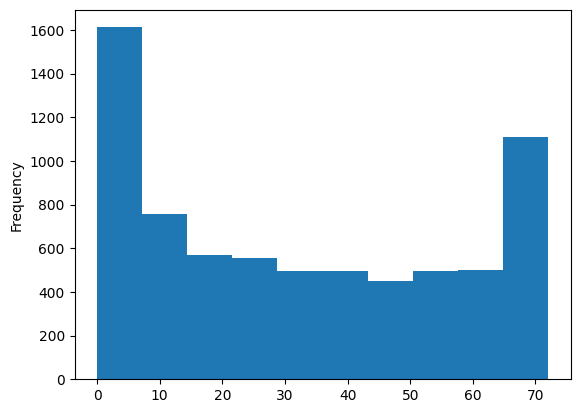

In [43]:
# Olhando a distribuição de frequência, vemos que a variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal. 
# E a grande maioria dos valores concentran-se nos extremos, ou seja, contratos novos e os aproximadamente acima dos 65 meses.
df_churn.TempoUso.plot.hist()

<Axes: ylabel='Frequency'>

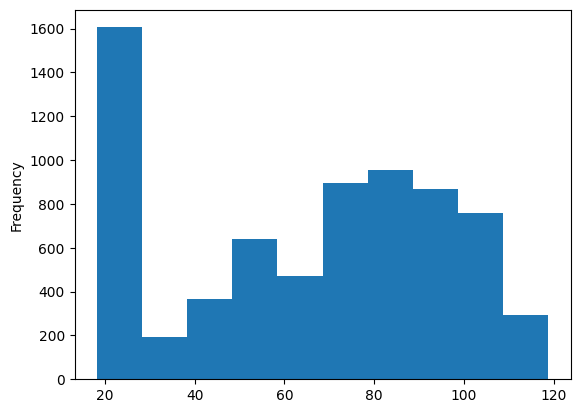

In [44]:
# Olhando a distribuição de frequência, vemos que a variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal. 
# E a grande maioria dos valores concentran-se nos extremos, ou seja, contratos novos e os aproximadamente acima dos 65 meses.
df_churn.Mensalidade.plot.hist()

### 5.4.1 - Medidas de Posição: Média, mediana e moda (Tempo de contrato)

In [45]:
# Média
df_churn.TempoUso.mean()

32.37114865824223

In [46]:
# Mediana
df_churn.TempoUso.median()

29.0

In [47]:
# Moda
df_churn.TempoUso.mode()

0    1
Name: TempoUso, dtype: int64

### 5.4.2 - Medidas de Dispersão: Desvio padrão, coeficiente de Variação

In [48]:
# Desvio Padrão
df_churn.TempoUso.std()

24.55948102309446

In [49]:
# Coeficiente de variação
df_churn.TempoUso.std()/df_churn.TempoUso.mean()*100

75.86842617906674

## 5.5 - Filtros e Agrupamentos
Nesta aula, aprendemos sobre como fazer contagens e agrupamentos de dados em um DataFrame usando o método count e a função groupby. Foi mostrado como contar a quantidade de itens em cada grupo, ordenar os resultados e criar gráficos para visualizar as informações de forma mais clara. Também foi explicado como filtrar os dados com base em condições específicas e realizar cálculos com os dados agrupados. Ao final da aula, foi ressaltada a importância de analisar as informações de forma univariada antes de realizar análises bivariadas.

### 5.5.1 - Filtro

In [50]:
# Quantos clientes possuem 1 mês de contrato?
df_churn[df_churn.TempoUso==1].TempoUso.count()

613

In [51]:
# Outra forma
len(df_churn[df_churn.TempoUso==1])

613

In [52]:
# Qual porcentagem de clientes que possuem 1 mês de contrato?
len(df_churn[df_churn.TempoUso==1])/len(df_churn)*100


8.70367741019452

In [53]:
# Quantos clientes possuem entre 1 e 6 mêses de contrato?
len(df_churn[(df_churn.TempoUso>=1) & (df_churn.TempoUso<=6)])

1470

### 5.5.2 - Agrupamento com sumarização

In [54]:
# Qual a quantidade de clientes por tempo de contrato
df_churn.groupby('TempoUso').TempoUso.count()

TempoUso
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: TempoUso, Length: 73, dtype: int64

In [55]:
# Qual a quantidade de clientes por tempo de contrato Ranking
df_churn.groupby('TempoUso').TempoUso.count().sort_values(ascending=False)

TempoUso
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: TempoUso, Length: 73, dtype: int64

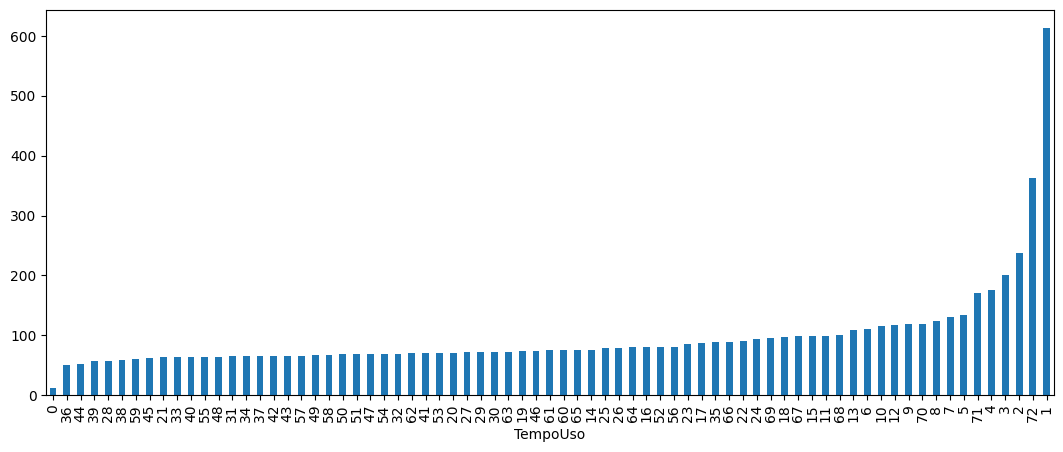

In [56]:
# Qual a quantidade de clientes por tempo de contrato Ranking no gráfico (plot)
ax = df_churn.groupby('TempoUso').TempoUso.count().sort_values().plot.bar(figsize = (13,5))

# 6 - Análise Bivariada
Nesta aula, vamos aprender sobre análise bivariada, uma técnica estatística que nos permite entender a relação entre duas variáveis em um conjunto de dados. Utilizaremos gráficos, tabelas cruzadas e cálculos de correlação para identificar padrões, associações e dependências entre essas variáveis. Isso nos ajudará a obter insights valiosos sobre como elas interagem, o que é fundamental para a análise de dados e tomada de decisões informadas. No módulo, exploraremos dois conceitos: análise de correlação e tabelas cruzadas. Vamos começar com o código.

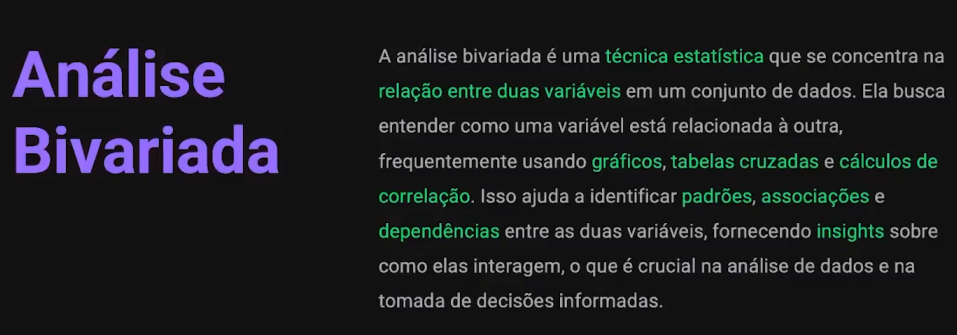

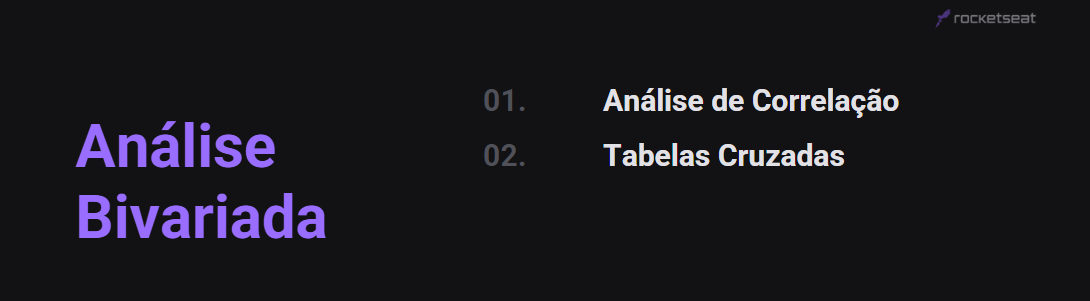

## 6.1 - Formulação de Hipóteses: Análise bivariada
- Quais clientes com contrato do tipo mensal são mais propensos ao churn?

## 6.2 - Hands-On - Tabela De Contingência
Nesta aula, aprendemos a construir uma tabela de contingência para analisar a relação entre duas variáveis. Utilizamos o método pd.crosstab para criar a tabela cruzada e contar a quantidade de clientes em cada combinação de categorias. Em seguida, interpretamos os resultados da tabela, observando se há alguma discrepância nas distribuições das categorias. Essa discrepância pode indicar uma correlação entre as variáveis. Também discutimos a importância de realizar testes estatísticos para validar essas correlações. No próximo vídeo, iremos explorar como realizar esses testes estatísticos.

In [57]:
# Contruir uma tabela de contingencia entre tipo de contrato e churn (Quantidade)
pd.crosstab(df_churn.CancelouServico, df_churn.PrazoContrato)

PrazoContrato,Month-to-month,One year,Two year
CancelouServico,,,
No,2220,1307,1647
Yes,1655,166,48


In [58]:
# Total (Quantidade)
pd.crosstab(df_churn.CancelouServico, df_churn.PrazoContrato, margins=True, margins_name='Total')

PrazoContrato,Month-to-month,One year,Two year,Total
CancelouServico,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [59]:
# Contruir uma tabela de contingencia entre tipo de contrato e churn (Proporção total)
pd.crosstab(df_churn.CancelouServico, df_churn.PrazoContrato, normalize=True, margins=True, margins_name='Total')*100

PrazoContrato,Month-to-month,One year,Two year,Total
CancelouServico,,,,
No,31.520658810166125,18.557432912111317,23.384921198352977,73.463012920630405
Yes,23.498509158029250,2.356950163282692,0.681527758057646,26.536987079369588
Total,55.019167968195369,20.914383075394007,24.066448956410621,100.000000000000000


In [60]:
# Contruir uma tabela de contingencia entre tipo de contrato e churn (Proporção isolada)
# Dessa forma o Total mantém a informação, mas isola por resultado do Churn, ou seja, somando cada linha resulta em 100%
# ---------------- INFORMAÇÕES QUE OBTEMOS COM ESSA ANÁLISE -------------------------
# Considerando o público total, os clientes de contrato mensal representa 55%. 
# Porém, se considerar apenas os clientes que abandonar o serviço, 88% tinham contrato mensal.
# Dessa forma podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono
pd.crosstab(df_churn.CancelouServico, df_churn.PrazoContrato, normalize='index', margins=True, margins_name='Total')*100

PrazoContrato,Month-to-month,One year,Two year
CancelouServico,,,
No,42.906841901816776,25.260919984538077,31.832238113645150
Yes,88.550026752273951,8.881754949170679,2.568218298555377
Total,55.019167968195369,20.914383075394007,24.066448956410621


## 6.3 - Hands-On - Correlação de variáveis qualitativas
- Avaliar a correlação entre dias variávesi categóricas (qualitativas)
- Executar teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
- Em um teste de hipótese, duas hipóteses são formuladas: 
1. **H0** (Hipótese nula): as duas variáveis são idenpendentes
2. **H1** (Hipótese complementar): as duas variáveis são denpendentes
- O conceito de um **Teste de Hipótese** é recusar ou confirmar a **Hipótese Nula (H0)** , ou seja se recusar o H0, considera o H1 e vice-versa.
- P-Value (por convenção é: 0.05, mas dependendo do caso pode ser mudado): Se H0 < p-value, recusamos a hipótese nula (H0) e seguimos com a complementar (H1).


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

In [2]:
# Inicializando o KNN Imputer 
imputer = KNNImputer(n_neighbors=2) 

# Usando 2 vizinhos mais próximos e Preenchendo os valores ausentes 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

NameError: name 'df' is not defined

In [61]:
# Gerar um DF da Crosstab sem totais (tabela de contingência)
df_crosstab_churn_contracts = pd.crosstab(df_churn.CancelouServico, df_churn.PrazoContrato)

In [62]:
# O resultado do chi2_contingency é uma Tupla = Lista imutável
# statistic (Qui-Quadrado) | pvalue | dof (Graus de liberdade) | expected_freq (Frequência esperada)
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contracts)
chi_scores_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

### 6.3.1 - Calcular o Score

In [63]:
# Para facilitar a visualização criaremos duas séries e converteremos para DF.
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])
scores_churn_contract

0   1184.596572083792580
dtype: float64

### 6.3.2 - Calcular o P-Values

In [96]:
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])
pvalues_churn_contract

0                                 1184.596572083792580
1                                    0.000000000000000
2                                                    2
3    [[2846.6917506744285, 1082.110180320886, 1245....
dtype: object

### 6.3.3 - Análise do Resultado

In [65]:
# Criar DF com o resultado e analisar Scores e P-Value
# Conforme Teste Estatístico (Chi-Square): P-Value é <= 0.05, então rejeitamos H0 e consideramos o H1, ou seja, as variáveis são dependentes.
# Pelo Qui2 alto, podemos afirmar que há uma forte correlação.
df_chi_scores_churn_contracts = pd.DataFrame({'Qui2': scores_churn_contract, 'P-Value': pvalues_churn_contract})
df_chi_scores_churn_contracts

,Qui2,P-Value
0,1184.596572083792580,0.000000000000000


## 6.4 - Hands-On - Correlação de variável qualitativa e quantitativa
Nesta aula, vamos abordar a análise de correlação entre uma variável qualitativa e uma variável quantitativa. Vamos utilizar o teste de Qsquare, mas primeiro precisamos transformar a variável quantitativa em uma variável qualitativa. Faremos isso criando uma nova coluna no DataFrame, onde os valores serão "yes" para clientes com menos de 6 meses de contrato e "no" para clientes com 6 meses ou mais. Em seguida, faremos a análise de correlação usando o teste de Qsquare e verificaremos se há uma correlação significativa entre churn e tempo de contrato inferior a 6 meses. Concluímos que a correlação entre churn e tempo de contrato é menor do que a correlação entre churn e tipo de contrato.<br>
- Usar o mesmo **Teste de Chi-Square**, mas antes transformar a variável quantitativa em qualitativa
- **Próxima Hipótese**: Clientes com menos de 6 meses de contrato é mais propenso ao churn?

In [66]:
df_churn.head()

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,Suporte,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes


In [67]:
# Transformar coluna TempoUso de quantitativa para qualitativa (Yes | No)
df_churn['TempoMenor6Meses'] = np.where(df_churn.TempoUso < 6, 'Yes', 'No')
df_churn.head(3)

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes


In [68]:
# Gerando a tabela cruzando para fazer o teste de hipótese
df_crosstab_churn_tenure = pd.crosstab(df_churn.CancelouServico, df_churn.TempoMenor6Meses)
df_crosstab_churn_tenure


TempoMenor6Meses,No,Yes
CancelouServico,,
No,4547,627
Yes,1125,744


In [69]:
# Gerar um DF da Crosstab sem totais (tabela de contingência) para calcular os Scores
df_crosstab_churn_tenure = pd.crosstab(df_churn.CancelouServico, df_churn.TempoMenor6Meses)

### 6.4.1 - Calcular o Score

In [70]:
# O resultado do chi2_contingency é uma Tupla = Lista imutável
# statistic (Qui-Quadrado) | pvalue | dof (Graus de liberdade) | expected_freq (Frequência esperada)
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)
chi_scores_churn_tenure

Chi2ContingencyResult(statistic=669.7216158287102, pvalue=1.1485390172689518e-147, dof=1, expected_freq=array([[4166.82209286, 1007.17790714],
       [1505.17790714,  363.82209286]]))

In [71]:
# Para facilitar a visualização criaremos duas séries e converteremos para DF.
scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
scores_churn_tenure

0   669.721615828710242
dtype: float64

### 6.4.2 - Calcular P-Values

In [72]:
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])
pvalues_churn_tenure

0   0.000000000000000
dtype: float64

### 6.4.3 - Análise do Resultado

In [73]:
# Criar DF com o resultado e analisar Scores e P-Value
# Conforme Teste Estatístico (Chi-Square): P-Value é <= 0.05, então rejeitamos H0 e consideramos o H1, ou seja, as variáveis são dependentes.
# Com base do Qui2 resultante das duas análises, podemos afirmar que a correlação entre CancelouServico (churn) e TempoMenor6Meses 
# é menor do que a correlação entre CancelouServico (churn) e PrazoContrato (contracts).
df_chi_scores_churn_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 'P-Value': pvalues_churn_tenure})
df_chi_scores_churn_tenure

,Qui2,P-Value
0,669.721615828710242,0.000000000000000


## 6.5 - Correlação entre variáveis numéricas (Quantitativas) - Person
Nesta aula, discutimos sobre a análise bivariada e como podemos analisar a correlação entre duas variáveis numéricas. Utilizamos o exemplo das variáveis "TENURE" (tempo de contrato) e "TOTAL CHARGES" (total pago durante o contrato) para ilustrar a intuição de que quanto maior o tempo de contrato, maior o valor pago. Calculamos a correlação utilizando o coeficiente de correlação de Pearson e também o método SPEARMAN, que captura correlações não lineares. Ambos os métodos mostraram uma forte correlação positiva entre as variáveis. Além disso, apresentamos um gráfico de dispersão para visualizar essa tendência. Propus dois desafios para validar hipóteses relacionadas à faixa etária do cliente e ao contrato mensal. Esses desafios podem ser trabalhados utilizando as técnicas aprendidas nesta aula.<br>

- TempoUso(Tenure) com TotalPagamentos(TotalCharges)
- Depois de analisar abaixo a correlação entre as duas variáveis usando os métodos de Person e Spearman<br>
concluímos que há uma forte relação entre as duas variáveis

In [74]:
df_churn.head()

,IDcliente,Genero,Mais65anos,PossuiParceiro,PossuiDependentes,Telefone,VariasLinhas,Internet,AntivirusOnline,BackupOnline,...,TVOnLine,FilmesOnline,TempoUso,PrazoContrato,SemFaturaImpressa,FormaPagamento,Mensalidade,TotalPagamentos,CancelouServico,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes


In [75]:
# Correlação entre duas variáveis numéricas - Person
df_churn.TempoUso.corr(df_churn.TotalPagamentos)

0.8258804609332018

In [76]:
# Correlação entre duas variáveis numéricas - Spearman
df_churn.TempoUso.corr(df_churn.TotalPagamentos, method='pearson')

0.8258804609332018

### 6.5.1 - Gráfico de Disspersão - Plot Scater

<Axes: xlabel='TempoUso', ylabel='TotalPagamentos'>

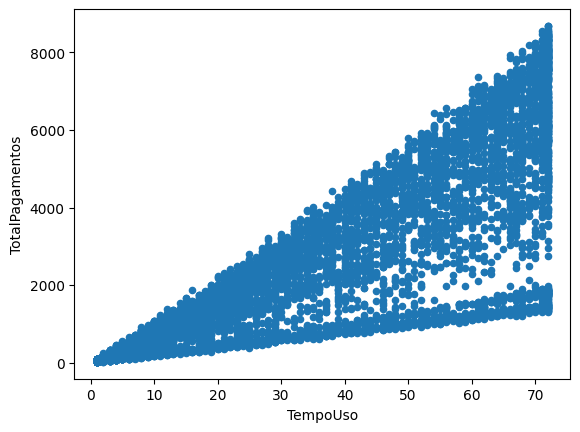

In [ ]:
# Quanto maior o tempo de contrat
df_churn.plot.scatter(x='TempoUso', y='TotalPagamentos')

- Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte associação com o Churn
- Desafio 2: Validar com teste de hipótese se contrato mensal está mais propenso ao churn

# 7 - Lidando com Outliers
Nesta aula, vamos falar sobre outliers ou valores atípicos em conjuntos de dados. Um outlier é um dado que é muito diferente dos outros dados em um conjunto. Eles podem ser causados por erros de medição, dados incompletos ou eventos aleatórios. Os outliers podem afetar os resultados da análise de dados, então é importante identificá-los e lidar com eles adequadamente. Vou fornecer algumas técnicas para lidar com outliers, como identificá-los e documentá-los, removê-los, transformar os dados, agrupá-los ou substituí-los. Também é importante entender a causa do outlier e considerar se é relevante para a análise. Agora, vamos para o código.

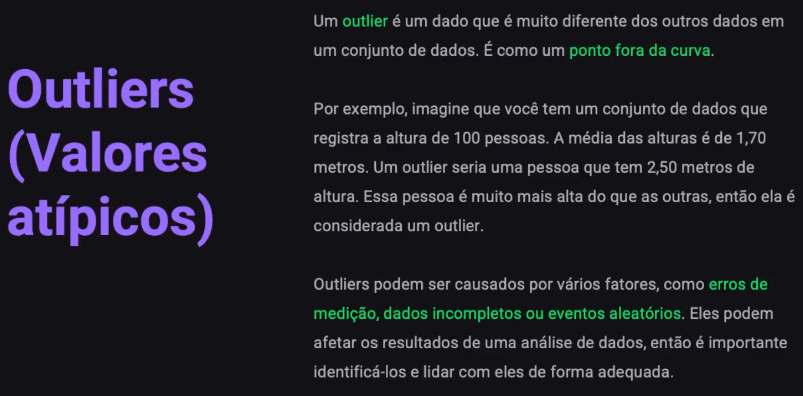

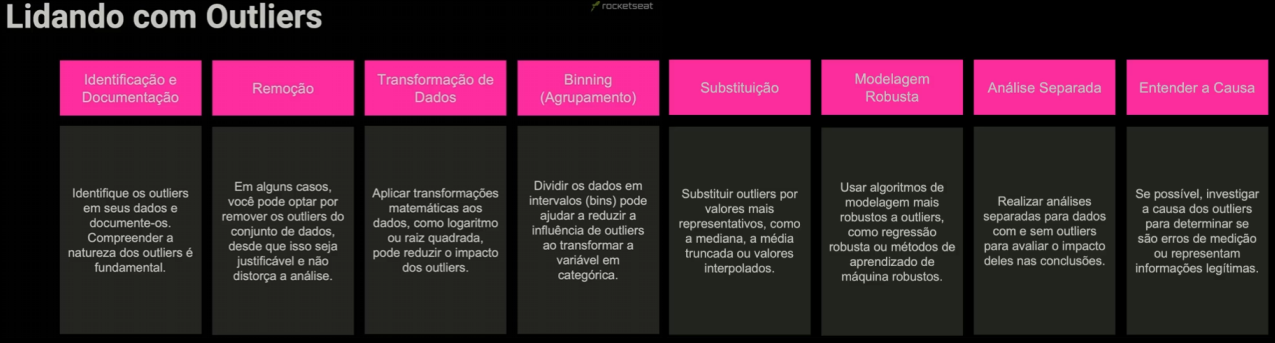

## 7.1 - Hands-On - Preparação Dataframe
Nesta aula, vamos abordar a detecção de outliers em um conjunto de dados. Primeiro, criamos um DataFrame apenas com clientes do tipo "contrato mensal". Em seguida, verificamos se a distribuição dos dados é normal, utilizando um histograma. Observamos que a distribuição não é normal, mas mesmo assim, vamos aplicar duas abordagens para detectar outliers. A primeira abordagem é utilizando o boxplot, que visualmente nos mostra se existem outliers na coluna analisada. No entanto, não encontramos outliers no conjunto de dados. Em seguida, exploramos a detecção de outliers agrupando o boxplot por tipo de contrato. Observamos que há outliers nos clientes com contrato de um ano. A partir disso, vamos utilizar técnicas de detecção de outliers para continuar nossa análise exploratória de dados.

### 7.1.1 - Detecção de Outliers (Valores Atípicos)
 - Quando for detectar outlier em uma coluna é importante que ela não tenha valores nulos (Removendo ou subtituindo)

### 7.1.2 - Gráfico BoxPlot
Depois de remover os valores nulos, analisaremos se há outliers com o Box Plot

<img width='700px' src='./img/Box-Plot.png'>

### 7.1.3 - Primeira abordagem removendo valores nulos ou ausentes
Quando removemos os valores verificamos se seguem ou não uma **Distribuição Normal** (Formato Sino)

In [98]:
# Consultando informações
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDcliente            7032 non-null   object 
 1   Genero               7032 non-null   object 
 2   Mais65anos           7032 non-null   int64  
 3   PossuiParceiro       7032 non-null   object 
 4   PossuiDependentes    7032 non-null   object 
 5   Telefone             7032 non-null   object 
 6   VariasLinhas         7032 non-null   object 
 7   Internet             7032 non-null   object 
 8   AntivirusOnline      7032 non-null   object 
 9   BackupOnline         7032 non-null   object 
 10  ProtecaoEquipamento  7032 non-null   object 
 11  Suporte              7032 non-null   object 
 12  TVOnLine             7032 non-null   object 
 13  FilmesOnline         7032 non-null   object 
 14  TempoUso             7032 non-null   int64  
 15  PrazoContrato        7032 non-null   object

In [79]:
# Removendo linhas com valores ausentes
df_churn.dropna(axis=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDcliente            7032 non-null   object 
 1   Genero               7032 non-null   object 
 2   Mais65anos           7032 non-null   int64  
 3   PossuiParceiro       7032 non-null   object 
 4   PossuiDependentes    7032 non-null   object 
 5   Telefone             7032 non-null   object 
 6   VariasLinhas         7032 non-null   object 
 7   Internet             7032 non-null   object 
 8   AntivirusOnline      7032 non-null   object 
 9   BackupOnline         7032 non-null   object 
 10  ProtecaoEquipamento  7032 non-null   object 
 11  Suporte              7032 non-null   object 
 12  TVOnLine             7032 non-null   object 
 13  FilmesOnline         7032 non-null   object 
 14  TempoUso             7032 non-null   int64  
 15  PrazoContrato        7032 non-null   object

<Axes: >

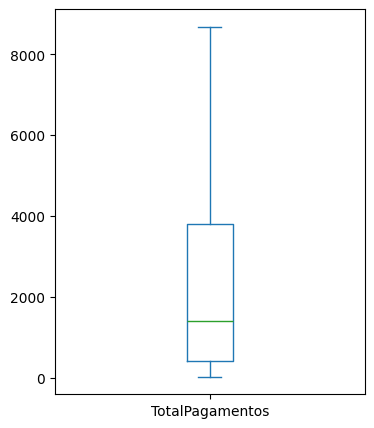

In [80]:
# Box plot todos os TotalPagamentos sem agrupar
ax = df_churn.TotalPagamentos.plot.box()
ax.figure.set_size_inches(4, 5)
ax

TotalPagamentos    Axes(0.125,0.11;0.775x0.77)
dtype: object

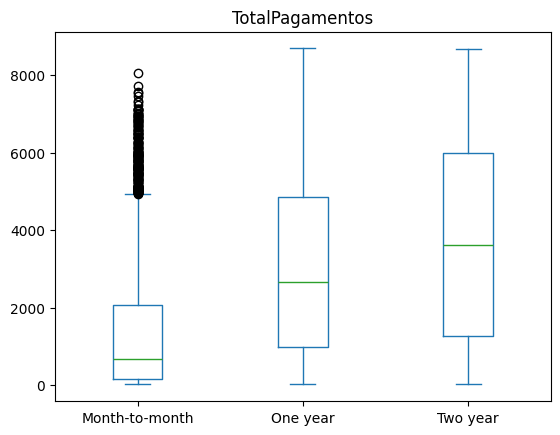

In [81]:
# Box Plot agrupado por Contrato
df_churn.plot.box(column='TotalPagamentos', by='PrazoContrato')

In [82]:
# Criar DF somente com clientes com contrato do tipó Month-to-Month
df_churn_month = df_churn[df_churn.PrazoContrato == 'Month-to-month']
df_churn_month.PrazoContrato.value_counts()

PrazoContrato
Month-to-month    3875
Name: count, dtype: int64

<Axes: >

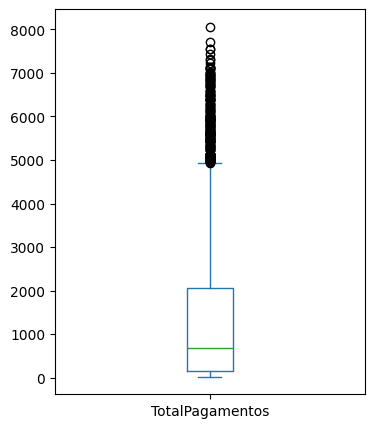

In [83]:
# Box Plot apenas dos contratos Month-to-Month
ax = df_churn_month.TotalPagamentos.plot.box()
ax.figure.set_size_inches(4, 5)
ax

## 7.2 - Método de Tukey - IQR ou IIQ (Distribuição não normal)
Nesta aula, vamos aprender sobre o método de Tukey para detectar outliers em distribuições não normais. O objetivo é calcular o Range Interquartile (IKR) e definir os limites para identificar os pontos acima ou abaixo desses limites. Vou mostrar como calcular o IKR usando a fórmula do terceiro quartil menos o primeiro quartil. No código, vamos usar a função Quantile para calcular os quartis e, em seguida, calcular o IKR. Também vamos definir os limites inferior e superior como 1,5 vezes o IKR e filtrar os registros que estão acima ou abaixo desses limites. No próximo vídeo, vamos explorar uma técnica para distribuições normais.

- IQR - Range Interquartil ou IIQ - Intervalo Inter Quartil
- IQR ou IIQ = 3º quartil - 1º quartil

<Axes: ylabel='Frequency'>

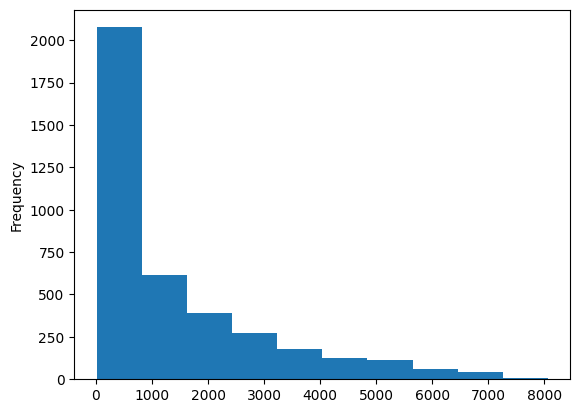

In [84]:
# Histograma - Checar visualmente se os dados seguem uma distribuição normal (Formato Sino)
df_churn_month.TotalPagamentos.plot.hist()

In [85]:
# IQR = 3º quartil - 1º quartil
# IQR = $ 1906.4
q1_TotalCharges_month = df_churn_month.TotalPagamentos.quantile(0.25)
q3_TotalCharges_month = df_churn_month.TotalPagamentos.quantile(0.75)
iqr_TotalCharges_month = q3_TotalCharges_month - q1_TotalCharges_month
iqr_TotalCharges_month

1906.4

In [86]:
# Calcular Limite Inferior e Superior
limInf_TotalCharges_month = q1_TotalCharges_month - (iqr_TotalCharges_month * 1.5)
limSup_TotalCharges_month = q3_TotalCharges_month + (iqr_TotalCharges_month * 1.5)
limInf_TotalCharges_month, limSup_TotalCharges_month

(-2699.5000000000005, 4926.1)

In [87]:
# A quantidade de outliers, ou seja, bolinhas abaixo do Limite Inferior ou acima do Limite Superior resultou em 200 em um total de 3875 registros
qtde_outliers = df_churn_month[(df_churn_month.TotalPagamentos < limInf_TotalCharges_month) | (df_churn_month.TotalPagamentos > limSup_TotalCharges_month)]
df_churn_month.shape[0], qtde_outliers.shape[0]

(3875, 200)

## 7.3 - Método de Zscore (Segue uma Distribuição normal)
Nesta aula, discutimos a detecção de outliers em um conjunto de dados usando o z-score. O z-score é uma medida estatística que indica quantos desvios padrões um ponto de dados está distante da média. Usamos o método np.abs do NumPy para transformar os valores em valores absolutos e, em seguida, definimos um limite de 3 para identificar os outliers. Ao aplicar o z-score ao DataFrame, filtramos os registros que estão acima desse limite e encontramos 65 outliers. Essa técnica é útil quando os dados seguem uma distribuição normal e pode ser usada para identificar e tratar outliers em futuras análises.

- Indica quantos desvios padrões um ponto específico de dados está distante ds média
- zscore = (x-media)/desvio padrao

<Axes: ylabel='Frequency'>

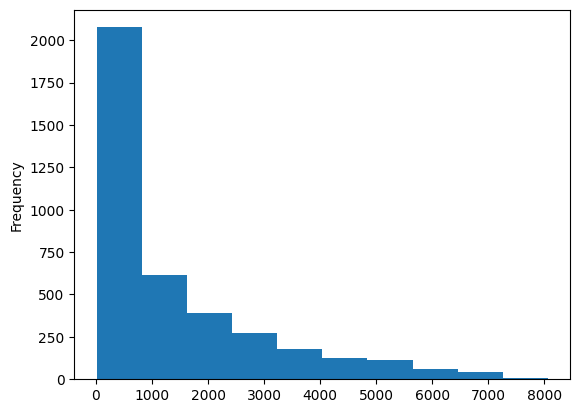

In [88]:
# Histograma - Checar visualmente se os dados seguem uma distribuição normal (Formato Sino)
df_churn_month.TotalPagamentos.plot.hist()

In [89]:
# Usando o método zscore do scipy
# Desvios padrões maiores que 3, sendo negatio ou possitivo, é uma boa referência para definir se é outlier ou não
z_score = zscore(df_churn_month.TotalPagamentos)
z_score

0      -0.830035854105835
2      -0.781512944511796
4      -0.754555772515107
5      -0.340066014124648
6       0.359519077072167
              ...        
7033    0.778346771186232
7034    3.418910216654943
7035    0.077987048610201
7040   -0.633837218378213
7041   -0.658532466747594
Name: TotalPagamentos, Length: 3875, dtype: float64

In [90]:
# Simplificando convertendo para valores absolutos removendo os sinais
z_score = np.abs(zscore(df_churn_month.TotalPagamentos))
z_score

0      0.830035854105835
2      0.781512944511796
4      0.754555772515107
5      0.340066014124648
6      0.359519077072167
              ...       
7033   0.778346771186232
7034   3.418910216654943
7035   0.077987048610201
7040   0.633837218378213
7041   0.658532466747594
Name: TotalPagamentos, Length: 3875, dtype: float64

In [91]:
# Quais são os outliers do churn contratos mensais
df_churn_month[z_score > 3.0].shape[0]

65

# 8 - Automatizar EDA
Nesta aula, vamos falar sobre a importância da automação na análise exploratória de dados (EDA) em projetos de inteligência artificial. Automatizar essa etapa traz diversas vantagens, como aumento da velocidade e eficiência do trabalho, redução da subjetividade e melhor compreensão dos dados. Além disso, vamos apresentar a biblioteca SuiteVis, que permite automatizar a análise de dados. Vamos começar!


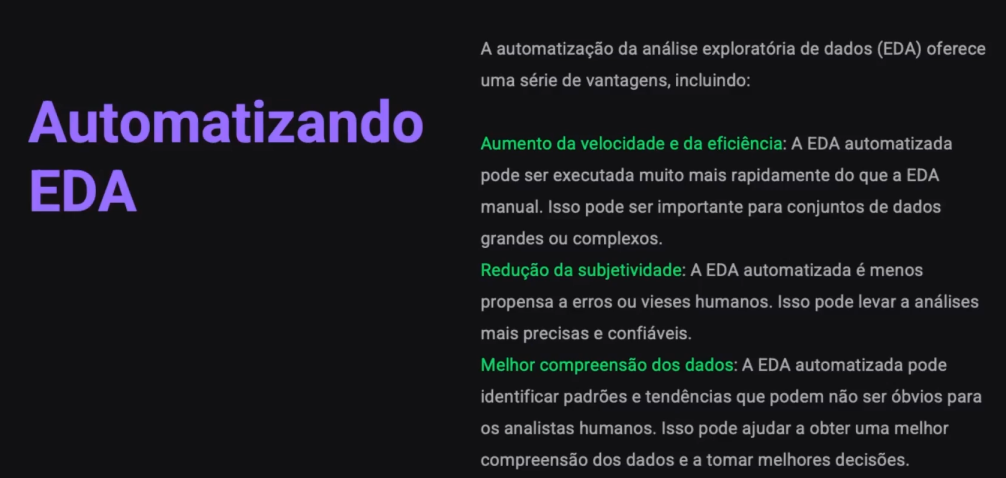

## 8.1 - Hands-On - Automatizando EDA
Nesta aula, vou mostrar como abrir e visualizar o relatório gerado pelo SweetViz dentro do Jupyter Notebook. Vou explicar como criar o relatório usando o método Analyze e definindo o DataFrame de interesse. O relatório mostrará informações gerais sobre o DataFrame, como o número de linhas, colunas, tipos de variáveis e estatísticas descritivas. Além disso, o relatório também apresentará visualizações comparando as variáveis com a variável de interesse, como tabelas de contingência e associações entre as variáveis. Por fim, vou mostrar como gerar um arquivo HTML do relatório para visualização em tela cheia no navegador.

### 8.1.1 - Criar o Relatório

In [92]:
# Abrir no Jupyter Notebook
sv_churn_report = sv.analyze(df_churn, target_feat='CancelouServico')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


### 8.1.1 - Visualizar o Relatório

In [93]:
#sv_churn_report.show_notebook()

In [94]:
sv_churn_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
